In [7]:
# Librerías 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [70]:
# Lectura
df = pd.read_csv("estacionhorapc.csv")

In [71]:
df.head()

,destino_id,0_dom_fin,0_jue_fin,0_lun_fin,0_mar_fin,0_mie_fin,0_sab_fin,0_vie_fin,10_dom_fin,10_jue_fin,...,8_mie_ini,8_sab_ini,8_vie_ini,9_dom_ini,9_jue_ini,9_lun_ini,9_mar_ini,9_mie_ini,9_sab_ini,9_vie_ini
0,2,0.053571,0.019868,0.000000,0.011494,0.000000,0.022727,0.000000,0.053571,0.059603,...,0.131250,0.038462,0.129252,0.022222,0.080537,0.084034,0.122581,0.131250,0.064103,0.102041
1,3,0.000000,0.000000,0.015385,0.000000,0.004831,0.017544,0.012195,0.050633,0.046053,...,0.105932,0.053571,0.146739,0.028302,0.044444,0.042254,0.049020,0.029661,0.071429,0.048913
2,4,0.000000,0.009569,0.005495,0.000000,0.016807,0.000000,0.024510,0.061538,0.071770,...,0.042146,0.064000,0.060345,0.061644,0.065217,0.036082,0.057692,0.049808,0.064000,0.038793
3,5,0.000000,0.000000,0.006250,0.000000,0.000000,0.000000,0.000000,0.049383,0.043716,...,0.062500,0.059322,0.046512,0.097561,0.095745,0.101266,0.096639,0.080357,0.093220,0.104651
4,6,0.000000,0.000000,0.009174,0.000000,0.000000,0.034483,0.008197,0.090909,0.064000,...,0.204724,0.159420,0.106383,0.155556,0.021053,0.037500,0.018692,0.023622,0.043478,0.010638


In [72]:
X_all = df.drop(['destino_id'], axis=1)

In [78]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_all)
    distortions.append(kmeanModel.inertia_)

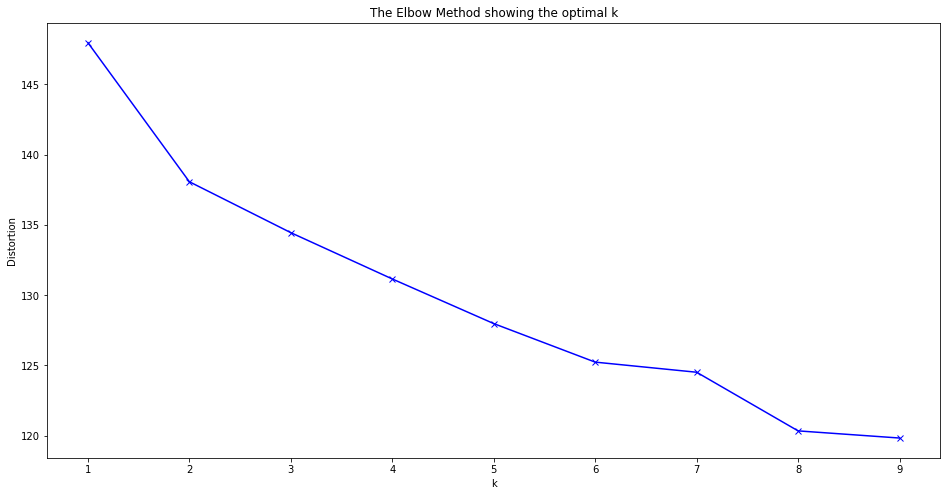

In [79]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [80]:
model = KMeans(n_clusters=6)
model.fit(X_all)

KMeans(n_clusters=6)

In [81]:
print(model.labels_)

[3 1 0 3 3 1 1 3 3 1 3 1 0 1 1 0 1 1 1 3 3 3 1 1 1 1 3 1 0 1 1 1 1 1 3 1 1
 1 0 0 0 1 0 0 1 1 1 3 1 1 1 1 1 1 3 1 1 3 1 1 1 0 0 0 0 3 1 1 1 1 3 1 3 1
 3 1 3 3 0 0 0 1 1 0 0 3 3 3 3 3 1 3 1 4 1 1 1 3 1 1 0 1 0 1 3 1 1 3 3 0 0
 0 3 5 1 0 1 1 0 0 3 0 1 0 1 3 3 1 3 2 1 3 3 3 3 0 0 3 3 1 3 0 0 1 3 3 3 3
 0 0 3 3 3 3 3 3 3 0 3 1 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 5 3 0 0 0 1 3 3 3 3 3 3 3 3 1 3 3 1 3 3 3 3 3 1 3 1 0
 0 0 1 1 1 1 3 0 1 3 3 1 3 0 1 1 3 3 1 1 3 3 1 1 3 1 3 1 3 3 3 0 0 0 1 3 3
 3 3 3 3 1 3 1 3 1 3 1 1 3 1 3 0 3 3 0 3 1 0 5 3 3 0 3 3 3 3 3 3 3 0 3 3 3
 3 3 3]


In [82]:
# reorder the cluster ids.
predictedY = np.choose(model.labels_, [0,1,2,3,4,5]).astype(np.int64)

In [83]:
resultados = model.predict(X_all)
resultados

array([3, 1, 0, 3, 3, 1, 1, 3, 3, 1, 3, 1, 0, 1, 1, 0, 1, 1, 1, 3, 3, 3,
       1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 3,
       1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 0, 0, 0, 1, 1, 0, 0, 3, 3, 3,
       3, 3, 1, 3, 1, 4, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1, 3, 1, 1, 3, 3, 0,
       0, 0, 3, 5, 1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 3, 3, 1, 3, 2, 1, 3,
       3, 3, 3, 0, 0, 3, 3, 1, 3, 0, 0, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 0,
       0, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3,
       1, 0, 0, 0, 1, 1, 1, 1, 3, 0, 1, 3, 3, 1, 3, 0, 1, 1, 3, 3, 1, 1,
       3, 3, 1, 1, 3, 1, 3, 1, 3, 3, 3, 0, 0, 0, 1, 3, 3, 3, 3, 3, 3, 1,
       3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 0, 3, 3, 0, 3, 1, 0, 5, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3])

In [84]:
df["cluster"]=list(resultados)

In [85]:
df.head()

,destino_id,0_dom_fin,0_jue_fin,0_lun_fin,0_mar_fin,0_mie_fin,0_sab_fin,0_vie_fin,10_dom_fin,10_jue_fin,...,8_sab_ini,8_vie_ini,9_dom_ini,9_jue_ini,9_lun_ini,9_mar_ini,9_mie_ini,9_sab_ini,9_vie_ini,cluster
0,2,0.053571,0.019868,0.000000,0.011494,0.000000,0.022727,0.000000,0.053571,0.059603,...,0.038462,0.129252,0.022222,0.080537,0.084034,0.122581,0.131250,0.064103,0.102041,3
1,3,0.000000,0.000000,0.015385,0.000000,0.004831,0.017544,0.012195,0.050633,0.046053,...,0.053571,0.146739,0.028302,0.044444,0.042254,0.049020,0.029661,0.071429,0.048913,1
2,4,0.000000,0.009569,0.005495,0.000000,0.016807,0.000000,0.024510,0.061538,0.071770,...,0.064000,0.060345,0.061644,0.065217,0.036082,0.057692,0.049808,0.064000,0.038793,0
3,5,0.000000,0.000000,0.006250,0.000000,0.000000,0.000000,0.000000,0.049383,0.043716,...,0.059322,0.046512,0.097561,0.095745,0.101266,0.096639,0.080357,0.093220,0.104651,3
4,6,0.000000,0.000000,0.009174,0.000000,0.000000,0.034483,0.008197,0.090909,0.064000,...,0.159420,0.106383,0.155556,0.021053,0.037500,0.018692,0.023622,0.043478,0.010638,3


In [86]:
df.to_csv('clusters.csv')